In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

In [19]:
df=pd.read_csv('heart.csv');

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

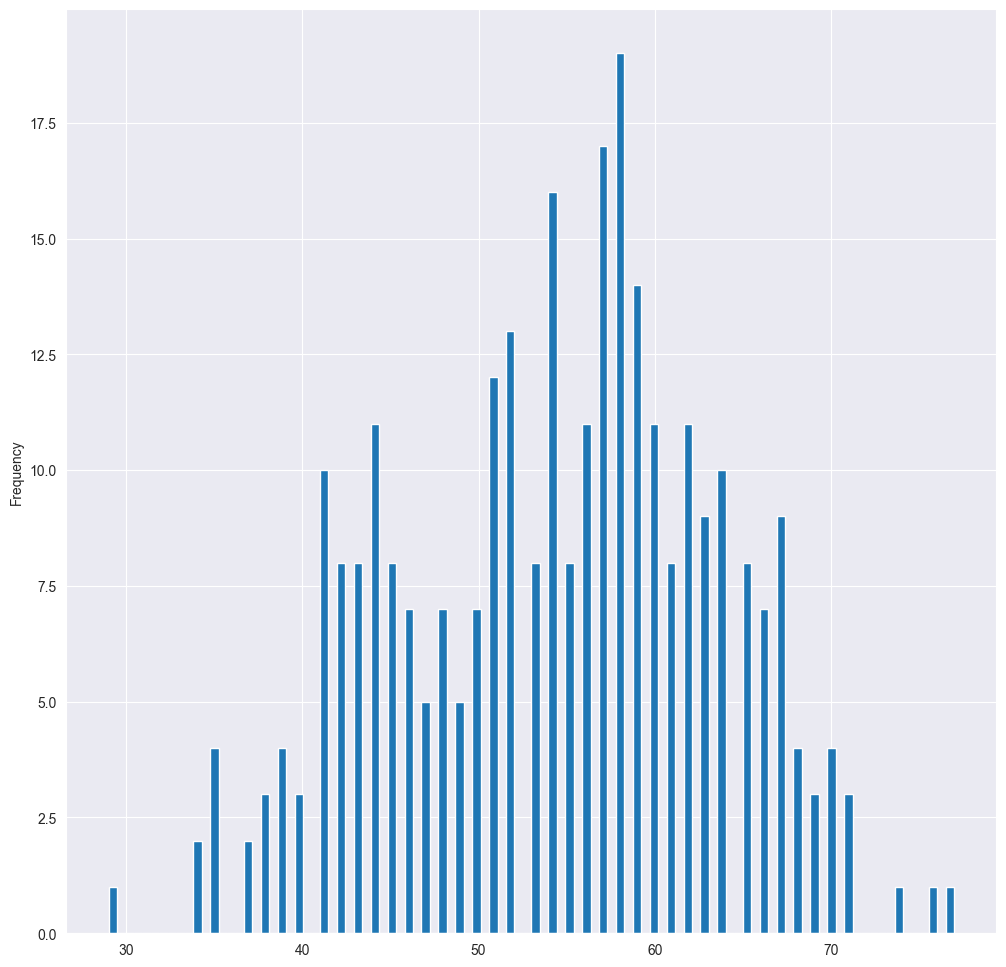

In [22]:
df.age.plot(kind = 'hist', bins = 100, figsize = (12,12))
plt.show()

In [23]:
df['chol'] = df['chol']/df['chol'].max()
df['chol'].head()

0    0.413121
1    0.443262
2    0.361702
3    0.418440
4    0.627660
Name: chol, dtype: float64

In [24]:
df['trestbps']=df['trestbps']/df['trestbps'].max()
df['trestbps'].head()

0    0.725
1    0.650
2    0.650
3    0.600
4    0.600
Name: trestbps, dtype: float64

In [25]:
df['thalach']=df['thalach']/df['thalach'].max()
df['thalach'].head()

0    0.742574
1    0.925743
2    0.851485
3    0.881188
4    0.806931
Name: thalach, dtype: float64

In [26]:
df[["age"]] = df[["age"]].astype("int64")

<AxesSubplot: ylabel='count'>

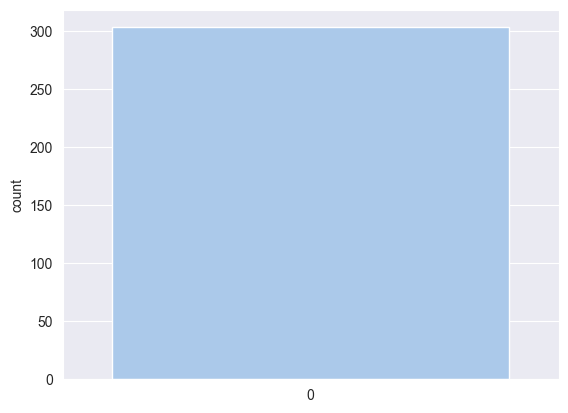

In [27]:
sn.countplot(df['target'], palette = 'pastel',color="orange")

In [28]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

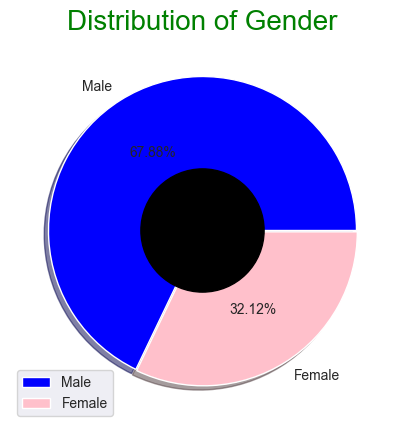

In [38]:
size = [205, 97]
colors = ['blue', 'pink']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.4, color = 'black')

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20,color="green")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

# Train and Test

In [43]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
X=df.iloc[:, :-1].values
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [44]:
y = df.iloc[:,13]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler

# scaling the dataset
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [48]:
X_train

array([[-1.32773282, -1.43641607,  0.98584243, ..., -0.66169316,
        -0.70710678, -0.46472917],
       [ 1.24903178, -1.43641607,  0.98584243, ..., -0.66169316,
         0.26516504, -0.46472917],
       [ 0.35276583,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       ...,
       [ 0.12869935,  0.69617712,  1.94013791, ..., -0.66169316,
        -0.70710678,  1.14190596],
       [-0.87959984,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       [ 0.35276583,  0.69617712,  0.03154696, ..., -0.66169316,
        -0.70710678, -0.46472917]])

In [49]:
X_test

array([[ 1.69716475,  0.69617712, -0.92274852,  0.77251645, -1.36354075,
        -0.41803981,  0.90163913, -1.07375268,  1.40984195,  1.2900049 ,
        -2.27916533, -0.70710678,  1.14190596],
       [ 1.02496529,  0.69617712,  1.94013791,  2.23625729, -0.3703119 ,
        -0.41803981, -0.97936664,  0.22375805, -0.70929937, -0.38883987,
        -0.66169316, -0.70710678,  1.14190596],
       [ 0.46479907,  0.69617712,  1.94013791,  2.23625729,  0.7728383 ,
        -0.41803981, -0.97936664,  0.39675948, -0.70929937, -0.72460883,
        -0.66169316, -0.70710678,  1.14190596],
       [ 0.57683232,  0.69617712, -0.92274852, -0.39847623,  0.21063328,
        -0.41803981, -0.97936664, -0.38174696,  1.40984195,  1.45788938,
        -0.66169316,  0.26516504,  1.14190596],
       [ 0.8008988 ,  0.69617712,  0.98584243, -0.10572806, -0.29535123,
        -0.41803981,  0.90163913, -0.16549517, -0.70929937,  0.61846699,
        -0.66169316,  2.20970869,  1.14190596],
       [-0.7675666 ,  0.696177